In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn_pandas import DataFrameMapper
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline, make_union
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.manifold import TSNE
import time
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

- t-Distributed Stochastic Neighbor Embedding (t-SNE)
- t-Distributed Stochastic Neighbor Embedding (t-SNE) is an unsupervised, non-linear technique primarily used for data exploration and visualizing high-dimensional data.
source: https://www.kdnuggets.com/2018/08/introduction-t-sne-python.html
- t-SNE differs from PCA by preserving only small pairwise distances or local similarities whereas PCA is concerned with preserving large pairwise distances to maximize variance. 

In [3]:
data = pd.read_csv('dimensionality_reduction_data.csv')

## tSNE
- we have so many dimensions that tsne isn't a great dimensionality reduction method
- takes too long

In [9]:
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=30, n_iter=250)
tsne_results = tsne.fit_transform(data)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 78025 samples in 2.269s...
[t-SNE] Computed neighbors for 78025 samples in 210.254s...
[t-SNE] Computed conditional probabilities for sample 1000 / 78025
[t-SNE] Computed conditional probabilities for sample 2000 / 78025
[t-SNE] Computed conditional probabilities for sample 3000 / 78025
[t-SNE] Computed conditional probabilities for sample 4000 / 78025
[t-SNE] Computed conditional probabilities for sample 5000 / 78025
[t-SNE] Computed conditional probabilities for sample 6000 / 78025
[t-SNE] Computed conditional probabilities for sample 7000 / 78025
[t-SNE] Computed conditional probabilities for sample 8000 / 78025
[t-SNE] Computed conditional probabilities for sample 9000 / 78025
[t-SNE] Computed conditional probabilities for sample 10000 / 78025
[t-SNE] Computed conditional probabilities for sample 11000 / 78025
[t-SNE] Computed conditional probabilities for sample 12000 / 78025
[t-SNE] Computed conditional probabilities for s

In [10]:
data['tsne-2d-one'] = tsne_results[:,0]
data['tsne-2d-two'] = tsne_results[:,1]

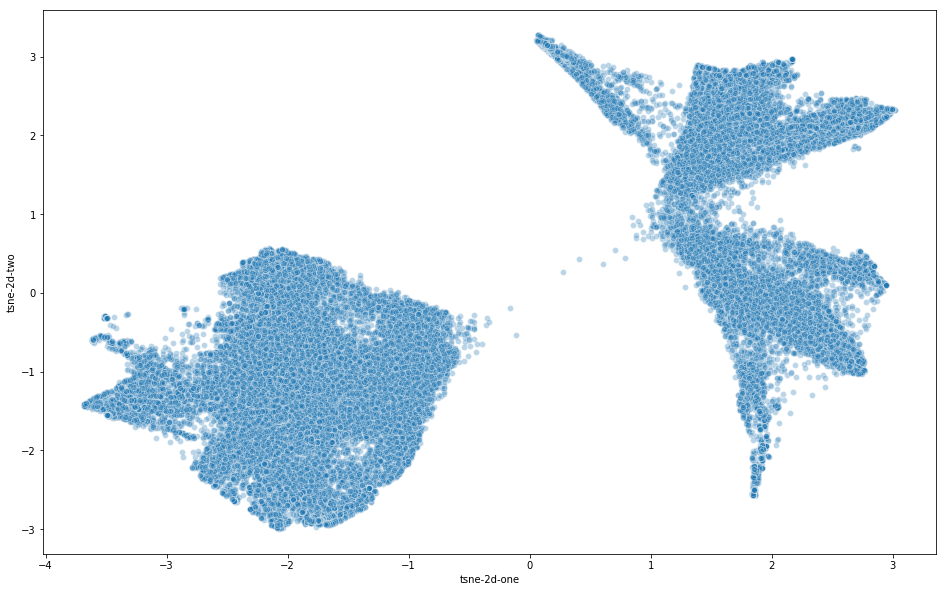

In [13]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    palette=sns.color_palette("hls", 10),
    data=data,
    legend="full",
    alpha=0.3
)

## pca visualization

In [18]:
pca = PCA(n_components=2)
x = data.loc[:, data.columns != 'Opportunity Result'].values ## get all the values ready for PCA

time_start = time.time()
principalComponents = pca.fit_transform(x)
print('PCA done! Time elapsed: {} seconds'.format(time.time()-time_start))

pcDf = pd.DataFrame(data = principalComponents
             , columns = ['pc1', 'pc2'])

PCA done! Time elapsed: 0.10017681121826172 seconds


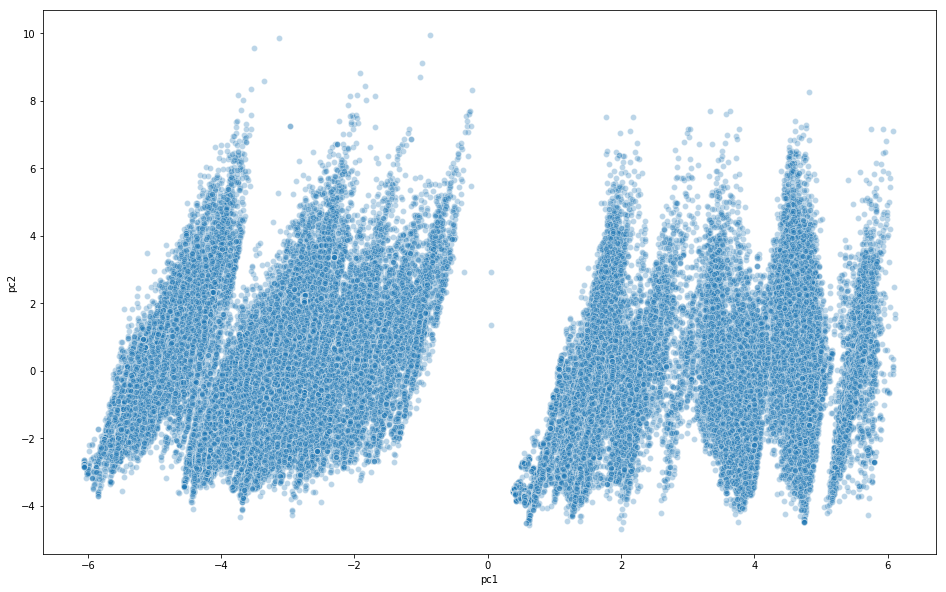

In [17]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="pc1", y="pc2",
    palette=sns.color_palette("hls", 10),
    data=pcDf,
    legend="full",
    alpha=0.3
)